In [4]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pickle
pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv("./user_category_final.csv")
df

,user_category_id,DOKUMENTNR,DOKDATUM,KUNDNR,VGRNR,ARTNR,BEN,BEN2,ANTAL,UTPRIS,RADBELOPP,PER,UTLEVERANS_STATUSKOD,UTLEVERANS_VARURADER_STATUSKOD
0,1,9697,2019-04-11,975,3100.0,110480506,REDUCERVENT. UNICONTROL 500 AR,NaN,1.0,1605.0,1284.00,NaN,5,1
1,2,10690,2021-05-11,975,2120.0,S06060,SEXKANTSKRUV M6X60 FZB,NaN,16.0,111.0,17.76,C,5,1
2,2,10776,2021-06-24,975,2120.0,S10030,SEXKANTSKRUV M10X30 FZB,NaN,4.0,260.0,10.40,C,5,1
3,2,10776,2021-06-24,975,2120.0,B10,BRICKA BRB 10.5 FZB,NaN,8.0,50.0,4.00,C,5,1
4,2,10776,2021-06-24,975,2120.0,L10,L�SMUTTER M10 FZB,NaN,4.0,110.0,4.40,C,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572015,22877,1115096,2021-06-23,1001,3831.0,03171102,PINNFR�S HM JME542005G3R005.0Z,2-SIRA,2.0,605.0,1028.50,NaN,5,1
572016,22877,1115096,2021-06-23,1001,3831.0,JH910M03002,"PINNFR�S HM 910 3MM R0,2 MEGA",910030R020-MEGA,2.0,531.0,902.70,NaN,5,1
572017,22877,1115096,2021-06-23,1001,3831.0,03171228,PINNFR�S HM JMB542010G1B.0Z2-S,IRA,2.0,571.0,970.70,NaN,5,1
572018,22877,1115096,2021-06-23,1001,3831.0,JS553100R050S,PINNFR�S HM,553100R050Z3.0-SIRON-A,2.0,712.0,1210.40,NaN,5,1


Observing negative utpris and antal values

In [6]:
df[(df['UTPRIS'] < 0) | (df['ANTAL'] < 0)]

,user_category_id,DOKUMENTNR,DOKDATUM,KUNDNR,VGRNR,ARTNR,BEN,BEN2,ANTAL,UTPRIS,RADBELOPP,PER,UTLEVERANS_STATUSKOD,UTLEVERANS_VARURADER_STATUSKOD
78,25,869091,2015-03-12,469,41020.0,A2412,Y-R�R A24 1/2 INV/UTV,NaN,-1.0,70.0,-70.00,NaN,5,1
79,25,869091,2015-03-12,469,41020.0,A4Z1214,REDUCERING A4/Z 1/2-1/4,NaN,-1.0,24.8,-24.80,NaN,5,1
156,13,1083243,2020-09-28,469,3100.0,31002,ST�LBORSTE 270X25 2-RAD,0008462132,-1.0,40.0,-36.00,NaN,5,1
191,41,1093093,2020-12-16,469,3917.0,T9980022,�GONDUSCH REFILL TOBIN 2ST/FP,NaN,-1.0,488.0,-439.20,NaN,5,1
258,22,981351,2018-02-13,469,3831.0,JH112M120,PINNFR�S RADIE HM 112 12MM,NaN,-1.0,1650.0,-1402.50,NaN,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571465,22887,1083246,2020-09-28,1001,38102.0,101105,"BORR 101 10,5 MM",NaN,-9.0,178.0,-1153.44,NaN,5,1
571466,22887,1083246,2020-09-28,1001,38102.0,101110,"BORR 101 11,0 MM",NaN,-5.0,223.0,-802.80,NaN,5,1
571794,22873,1001714,2018-08-24,1001,4170.0,077270114,F�RL�NGNINGSR�R CEJN 500MM,11 208 0220,-2.0,173.0,-276.80,NaN,5,1
571944,22918,1123602,2021-09-22,1001,411.0,83123005,MIKROBRYTARE 83.123.0 2M,NaN,-2.0,570.0,-1140.00,NaN,5,1


In [7]:
df[(df['UTPRIS'] < 0) & (df['ANTAL'] < 0)]

,user_category_id,DOKUMENTNR,DOKDATUM,KUNDNR,VGRNR,ARTNR,BEN,BEN2,ANTAL,UTPRIS,RADBELOPP,PER,UTLEVERANS_STATUSKOD,UTLEVERANS_VARURADER_STATUSKOD
392350,16610,1161363,2022-07-12,1232,3860.0,03272862,SK�R XOMX180608TR-ME13 MP2501,NaN,-10.0,-200.0,1344.0,NaN,5,1


In [8]:
df[df['ANTAL'] < 0]

,user_category_id,DOKUMENTNR,DOKDATUM,KUNDNR,VGRNR,ARTNR,BEN,BEN2,ANTAL,UTPRIS,RADBELOPP,PER,UTLEVERANS_STATUSKOD,UTLEVERANS_VARURADER_STATUSKOD
78,25,869091,2015-03-12,469,41020.0,A2412,Y-R�R A24 1/2 INV/UTV,NaN,-1.0,70.0,-70.00,NaN,5,1
79,25,869091,2015-03-12,469,41020.0,A4Z1214,REDUCERING A4/Z 1/2-1/4,NaN,-1.0,24.8,-24.80,NaN,5,1
156,13,1083243,2020-09-28,469,3100.0,31002,ST�LBORSTE 270X25 2-RAD,0008462132,-1.0,40.0,-36.00,NaN,5,1
191,41,1093093,2020-12-16,469,3917.0,T9980022,�GONDUSCH REFILL TOBIN 2ST/FP,NaN,-1.0,488.0,-439.20,NaN,5,1
258,22,981351,2018-02-13,469,3831.0,JH112M120,PINNFR�S RADIE HM 112 12MM,NaN,-1.0,1650.0,-1402.50,NaN,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571465,22887,1083246,2020-09-28,1001,38102.0,101105,"BORR 101 10,5 MM",NaN,-9.0,178.0,-1153.44,NaN,5,1
571466,22887,1083246,2020-09-28,1001,38102.0,101110,"BORR 101 11,0 MM",NaN,-5.0,223.0,-802.80,NaN,5,1
571794,22873,1001714,2018-08-24,1001,4170.0,077270114,F�RL�NGNINGSR�R CEJN 500MM,11 208 0220,-2.0,173.0,-276.80,NaN,5,1
571944,22918,1123602,2021-09-22,1001,411.0,83123005,MIKROBRYTARE 83.123.0 2M,NaN,-2.0,570.0,-1140.00,NaN,5,1


In [9]:
df[df['UTPRIS'] < 0]

,user_category_id,DOKUMENTNR,DOKDATUM,KUNDNR,VGRNR,ARTNR,BEN,BEN2,ANTAL,UTPRIS,RADBELOPP,PER,UTLEVERANS_STATUSKOD,UTLEVERANS_VARURADER_STATUSKOD
392350,16610,1161363,2022-07-12,1232,3860.0,03272862,SK�R XOMX180608TR-ME13 MP2501,NaN,-10.0,-200.0,1344.0,NaN,5,1
392481,16610,1163698,2022-08-23,1232,3860.0,03272862,SK�R XOMX180608TR-ME13 MP2501,NaN,10.0,-200.0,-1344.0,NaN,5,1


Getting important columns

In [10]:
df.rename(columns={'DOKDATUM': 'date'}, inplace=True)

In [11]:
extracted_data = df[['user_category_id', 'date', 'BEN', 'ANTAL', 'UTPRIS']].sort_values(by=['user_category_id', 'date'])
extracted_data

,user_category_id,date,BEN,ANTAL,UTPRIS
21057,1,2013-02-13,V�VTEJP SILVER 50MMX50M,1.0,113.00
252401,1,2013-02-14,SLANGKL�MMA MINI 15 MM,3.0,7.00
252402,1,2013-02-14,SLANGKL�MMA BL� 19-28,1.0,8.75
238882,1,2013-02-28,SLANGKL�MMA BL� 32-44,4.0,7.00
1953,1,2013-03-01,PLASTMODDLARE 1061-25,10.0,7.50
...,...,...,...,...,...
568512,22920,2021-04-16,SLANGVINDAF�R 20M SLANG,1.0,4150.00
568513,22920,2021-04-16,H�GTRYCKSTV�TT HDS 8/18-4CX,1.0,32000.00
569628,22920,2021-06-30,ADAPTER 2 M22 EASYLOCK,1.0,315.00
571965,22920,2021-08-13,SNABBKOPPLING HANE EASYLOCK,1.0,372.00


In [12]:
# remove negative antal and utpris
df = df[df['ANTAL']>0]
df = df[df['UTPRIS']>0]

Create column 'amount_spent', referring to total amount spent per order

In [13]:
df['amount_spent'] = df['UTPRIS'] * df['ANTAL']

extracted_data = (
    df[['user_category_id', 'date', 'amount_spent']].sort_values(by=['user_category_id', 'date'])
    .groupby(by=['user_category_id', 'date'])
    .sum().reset_index()
)
extracted_data


,user_category_id,date,amount_spent
0,1,2013-02-13,113.00
1,1,2013-02-14,29.75
2,1,2013-02-28,28.00
3,1,2013-03-01,75.00
4,1,2013-03-05,82.00
...,...,...,...
332679,22920,2020-06-25,773.00
332680,22920,2021-04-16,45169.00
332681,22920,2021-06-30,315.00
332682,22920,2021-08-13,372.00


In [14]:
extracted_data.to_csv('./extracted.csv', index=False)

In [15]:
extracted_data = pd.read_csv('./extracted.csv')

Create column date_diff. Note that this column is not used at all.

In [16]:
extracted_data['date'] = pd.to_datetime(extracted_data['date'])
extracted_data['date_diff'] = extracted_data[['user_category_id', 'date']].groupby(by=['user_category_id']).diff()

In [17]:
extracted_data

,user_category_id,date,amount_spent,date_diff
0,1,2013-02-13,113.00,NaT
1,1,2013-02-14,29.75,1 days
2,1,2013-02-28,28.00,14 days
3,1,2013-03-01,75.00,1 days
4,1,2013-03-05,82.00,4 days
...,...,...,...,...
332679,22920,2020-06-25,773.00,1050 days
332680,22920,2021-04-16,45169.00,295 days
332681,22920,2021-06-30,315.00,75 days
332682,22920,2021-08-13,372.00,44 days


Removing user-category pairs that have less than 10 orders

In [18]:
x = extracted_data['user_category_id'].value_counts()

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([4., 1., 2., 0., 2., 0., 2., 0., 0., 1.]),
 array([1002. , 1069.3, 1136.6, 1203.9, 1271.2, 1338.5, 1405.8, 1473.1,
        1540.4, 1607.7, 1675. ]),
 <BarContainer object of 10 artists>)

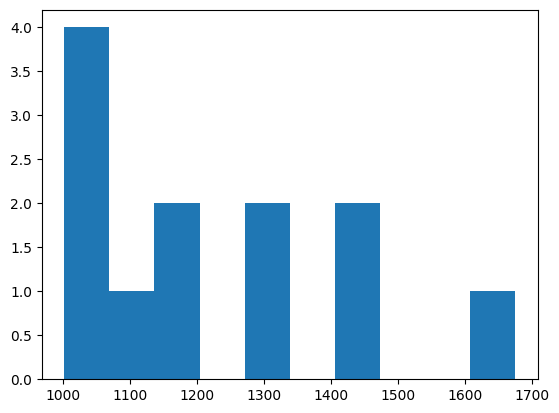

In [20]:
plt.hist(x[x>1000])

{'whiskers': [<matplotlib.lines.Line2D at 0x2044b1e1d50>,
 'caps': [<matplotlib.lines.Line2D at 0x2044b1e2290>,
 'boxes': [<matplotlib.lines.Line2D at 0x2044b1e1ab0>],
 'medians': [<matplotlib.lines.Line2D at 0x2044b1e27d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2044b1e2a70>],
 'means': []}

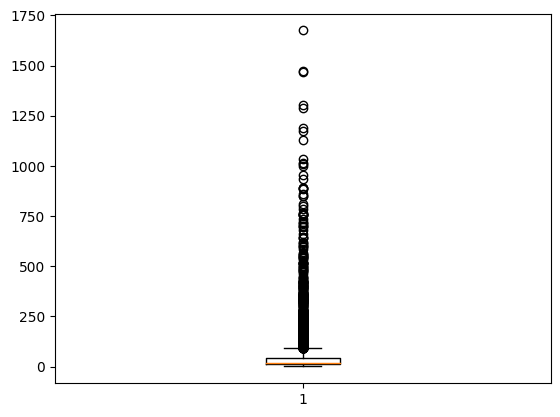

In [21]:
plt.boxplot(x)

In [22]:
x.describe()

count    7017.000000
mean       47.411144
std        95.844138
min         1.000000
25%        11.000000
50%        19.000000
75%        43.000000
max      1675.000000
Name: user_category_id, dtype: float64

In [23]:
x[x>8]

20385    1675
8207     1472
5168     1470
3562     1303
18922    1288
         ... 
10150       9
1148        9
15574       9
9688        9
19263       9
Name: user_category_id, Length: 6027, dtype: int64

In [24]:
x[x>10]

20385    1675
8207     1472
5168     1470
3562     1303
18922    1288
         ... 
19677      11
16632      11
19709      11
21829      11
15650      11
Name: user_category_id, Length: 5364, dtype: int64

In [25]:
more_than_10 = extracted_data[extracted_data['user_category_id'].isin(x[x>10].index)]

In [26]:
more_than_10

,user_category_id,date,amount_spent,date_diff
0,1,2013-02-13,113.00,NaT
1,1,2013-02-14,29.75,1 days
2,1,2013-02-28,28.00,14 days
3,1,2013-03-01,75.00,1 days
4,1,2013-03-05,82.00,4 days
...,...,...,...,...
332672,22918,2020-01-17,3375.00,77 days
332673,22918,2020-12-10,2850.00,328 days
332674,22918,2021-09-17,3990.00,281 days
332675,22918,2021-09-20,1710.00,3 days


{'whiskers': [<matplotlib.lines.Line2D at 0x2044a4d6680>,
 'caps': [<matplotlib.lines.Line2D at 0x2044a4d6bc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2044a4d63e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2044a4d7100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2044a4d73a0>],
 'means': []}

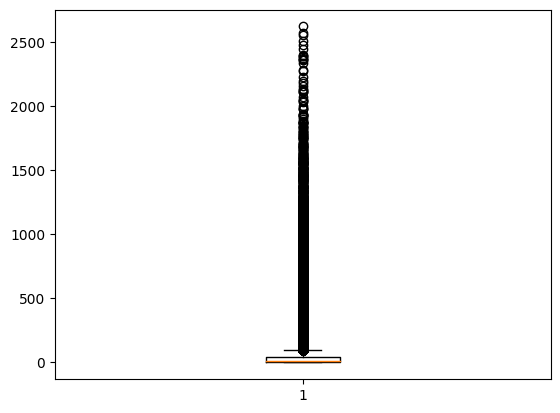

In [27]:
plt.boxplot(more_than_10['date_diff'].dt.days.fillna(0))

In [28]:
more_than_10['date_diff'].dt.days.fillna(0)

0           0.0
1           1.0
2          14.0
3           1.0
4           4.0
          ...  
332672     77.0
332673    328.0
332674    281.0
332675      3.0
332676    168.0
Name: date_diff, Length: 320364, dtype: float64

In [29]:
more_than_10['date_diff'].dt.days

0           NaN
1           1.0
2          14.0
3           1.0
4           4.0
          ...  
332672     77.0
332673    328.0
332674    281.0
332675      3.0
332676    168.0
Name: date_diff, Length: 320364, dtype: float64

In [30]:
more_than_10['date_diff'] = more_than_10['date_diff'].dt.days.fillna(0)

In [31]:
more_than_10

,user_category_id,date,amount_spent,date_diff
0,1,2013-02-13,113.00,0.0
1,1,2013-02-14,29.75,1.0
2,1,2013-02-28,28.00,14.0
3,1,2013-03-01,75.00,1.0
4,1,2013-03-05,82.00,4.0
...,...,...,...,...
332672,22918,2020-01-17,3375.00,77.0
332673,22918,2020-12-10,2850.00,328.0
332674,22918,2021-09-17,3990.00,281.0
332675,22918,2021-09-20,1710.00,3.0


Some observations about how long the customers have been buying

In [32]:
total_customer_product_length = more_than_10[['user_category_id', 'date_diff']].groupby(by='user_category_id').sum()

,date_diff
count,5364.000000
mean,2797.846383
std,886.411006
min,86.000000
25%,2352.000000
50%,3150.000000
75%,3500.000000
max,3651.000000


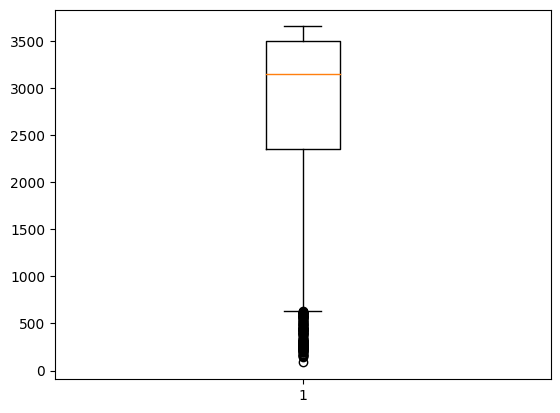

In [33]:
plt.boxplot(total_customer_product_length)
total_customer_product_length.describe()

In [34]:
cleaned_df = more_than_10[more_than_10['user_category_id'].isin(total_customer_product_length[total_customer_product_length>365].index)]
cleaned_df

,user_category_id,date,amount_spent,date_diff
0,1,2013-02-13,113.00,0.0
1,1,2013-02-14,29.75,1.0
2,1,2013-02-28,28.00,14.0
3,1,2013-03-01,75.00,1.0
4,1,2013-03-05,82.00,4.0
...,...,...,...,...
332672,22918,2020-01-17,3375.00,77.0
332673,22918,2020-12-10,2850.00,328.0
332674,22918,2021-09-17,3990.00,281.0
332675,22918,2021-09-20,1710.00,3.0


count    320364.000000
mean         46.845613
std         107.784415
min           0.000000
25%           4.000000
50%          12.000000
75%          42.000000
max        2619.000000
Name: date_diff, dtype: float64

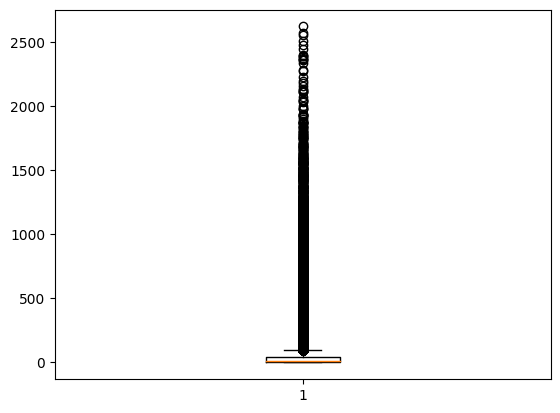

In [35]:
plt.boxplot(cleaned_df['date_diff'])
cleaned_df['date_diff'].describe()

In [36]:
user_cat_more_than_90_days_between_orders = cleaned_df[cleaned_df['date_diff'] > 90]['user_category_id'].unique()
len(user_cat_more_than_90_days_between_orders)

5096

In [37]:
user_cat_more_than_180_days_between_orders = cleaned_df[cleaned_df['date_diff'] > 180]['user_category_id'].unique()
cleaned_df[cleaned_df['user_category_id'].isin(user_cat_more_than_180_days_between_orders)].to_csv('./more_than_180_days.csv', index=False)
len(user_cat_more_than_180_days_between_orders)

4513

In [38]:
cleaned_df[cleaned_df['user_category_id'].isin(user_cat_more_than_90_days_between_orders)].to_csv('./more_than_90_days.csv', index=False)

In [39]:
cleaned_df.to_csv('./cleaned.csv', index=False)

In [40]:
cleaned_df = pd.read_csv('./cleaned.csv')
cleaned_df

,user_category_id,date,amount_spent,date_diff
0,1,2013-02-13,113.00,0.0
1,1,2013-02-14,29.75,1.0
2,1,2013-02-28,28.00,14.0
3,1,2013-03-01,75.00,1.0
4,1,2013-03-05,82.00,4.0
...,...,...,...,...
320359,22918,2020-01-17,3375.00,77.0
320360,22918,2020-12-10,2850.00,328.0
320361,22918,2021-09-17,3990.00,281.0
320362,22918,2021-09-20,1710.00,3.0


In [41]:
cleaned_df[cleaned_df['amount_spent'] < 0]

,user_category_id,date,amount_spent,date_diff


In [42]:
labels_df = pd.read_csv('./user_category_labels.csv')
labels_df

,user_category_id,label
0,1,False
1,2,False
2,3,True
3,4,True
4,5,False
...,...,...
7027,22913,False
7028,22916,True
7029,22917,False
7030,22918,False


In [43]:
churned_ucid_list = labels_df[labels_df['label']]['user_category_id'].unique()
churned_df = cleaned_df[cleaned_df['user_category_id'].isin(churned_ucid_list)]
max_dates_by_ucid = churned_df[['user_category_id', 'date']].groupby(by=['user_category_id']).max()

In [44]:
def label_orders(row):
    if(row['user_category_id'] not in churned_ucid_list):
        return False
    elif(row['date'] == max_dates_by_ucid.loc[row['user_category_id']][0]):
        return True
    else:
        return False
cleaned_df['churned'] = cleaned_df.apply(label_orders, axis=1)
cleaned_df

,user_category_id,date,amount_spent,date_diff,churned
0,1,2013-02-13,113.00,0.0,False
1,1,2013-02-14,29.75,1.0,False
2,1,2013-02-28,28.00,14.0,False
3,1,2013-03-01,75.00,1.0,False
4,1,2013-03-05,82.00,4.0,False
...,...,...,...,...,...
320359,22918,2020-01-17,3375.00,77.0,False
320360,22918,2020-12-10,2850.00,328.0,False
320361,22918,2021-09-17,3990.00,281.0,False
320362,22918,2021-09-20,1710.00,3.0,False


In [46]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

weeks_before_churn = 24
p1_weeks = 12

def p1_amount_spent(row):
    p1_end_date = row['date'] - pd.Timedelta(weeks=weeks_before_churn)
    p1_start_date = p1_end_date - pd.Timedelta(weeks=p1_weeks)
    
    p1_rows = cleaned_df[
        (cleaned_df['date'] >= p1_start_date) 
        & (cleaned_df['date'] <= p1_end_date) 
        & (cleaned_df['user_category_id'] == row['user_category_id'])
    ]
    # print(p1_rows['amount_spent'].sum())
    return p1_rows['amount_spent'].sum()
    
cleaned_df['p1'] = cleaned_df.apply(p1_amount_spent, axis=1)
cleaned_df

,user_category_id,date,amount_spent,date_diff,churned,p1
0,1,2013-02-13,113.00,0.0,False,0.0
1,1,2013-02-14,29.75,1.0,False,0.0
2,1,2013-02-28,28.00,14.0,False,0.0
3,1,2013-03-01,75.00,1.0,False,0.0
4,1,2013-03-05,82.00,4.0,False,0.0
...,...,...,...,...,...,...
320359,22918,2020-01-17,3375.00,77.0,False,0.0
320360,22918,2020-12-10,2850.00,328.0,False,0.0
320361,22918,2021-09-17,3990.00,281.0,False,0.0
320362,22918,2021-09-20,1710.00,3.0,False,0.0


In [47]:
cleaned_df['previous_p1'] = cleaned_df[['user_category_id', 'p1']].groupby(by=['user_category_id']).shift()

In [48]:
# ignore the p2 column here, it is a typo
cleaned_df.iloc[320:370]

,user_category_id,date,amount_spent,date_diff,churned,p1,previous_p1
320,1,2021-12-23,1192.00,2.0,False,2039.34,2039.34
321,1,2021-12-29,1015.00,6.0,False,1959.20,2039.34
322,1,2022-01-05,0.12,7.0,False,1959.20,1959.20
323,1,2022-01-27,1759.00,22.0,False,1931.00,1959.20
324,1,2022-02-09,300.00,13.0,False,654.00,1931.00
325,1,2022-02-16,126.00,7.0,False,990.00,654.00
326,1,2022-02-25,418.00,9.0,False,990.00,990.00
327,1,2022-03-02,300.00,5.0,False,990.00,990.00
328,1,2022-03-15,499.00,13.0,False,804.00,990.00
329,1,2022-03-21,1055.60,6.0,False,804.00,804.00


In [49]:
cleaned_df = cleaned_df.dropna()
cleaned_df

,user_category_id,date,amount_spent,date_diff,churned,p1,previous_p1
1,1,2013-02-14,29.75,1.0,False,0.0,0.0
2,1,2013-02-28,28.00,14.0,False,0.0,0.0
3,1,2013-03-01,75.00,1.0,False,0.0,0.0
4,1,2013-03-05,82.00,4.0,False,0.0,0.0
5,1,2013-04-03,4447.00,29.0,False,0.0,0.0
...,...,...,...,...,...,...,...
320359,22918,2020-01-17,3375.00,77.0,False,0.0,0.0
320360,22918,2020-12-10,2850.00,328.0,False,0.0,0.0
320361,22918,2021-09-17,3990.00,281.0,False,0.0,0.0
320362,22918,2021-09-20,1710.00,3.0,False,0.0,0.0


Features used are:
- p1: total amount spent during the time period p1 relative to the date of this order
- previous_p1: total amount spent during the time period p1 relative to the date of the previous order

In [50]:
X = cleaned_df[['p1', 'previous_p1']]
y = cleaned_df['churned']

In [51]:
X

,p1,previous_p1
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
...,...,...
320359,0.0,0.0
320360,0.0,0.0
320361,0.0,0.0
320362,0.0,0.0


In [52]:
y

1         False
2         False
3         False
4         False
5         False
          ...  
320359    False
320360    False
320361    False
320362    False
320363    False
Name: churned, Length: 315000, dtype: bool

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
classifier = svm.SVC(random_state=42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

[[78413     0]
 [  337     0]]


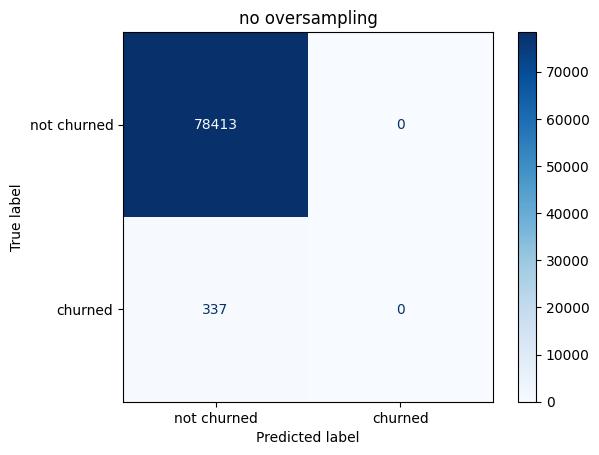

In [55]:
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=['not churned','churned'],
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('no oversampling')

print(disp.confusion_matrix)

plt.show()

In [56]:
smote = SMOTE()
print("starting to resample")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

starting to resample


In [57]:
resampled_classifier = svm.SVC(random_state=42, verbose=True)
resampled_classifier.fit(X_train_resampled, y_train_resampled)

[LibSVM]

SVC(random_state=42, verbose=True)

[[34161 44252]
 [   38   299]]


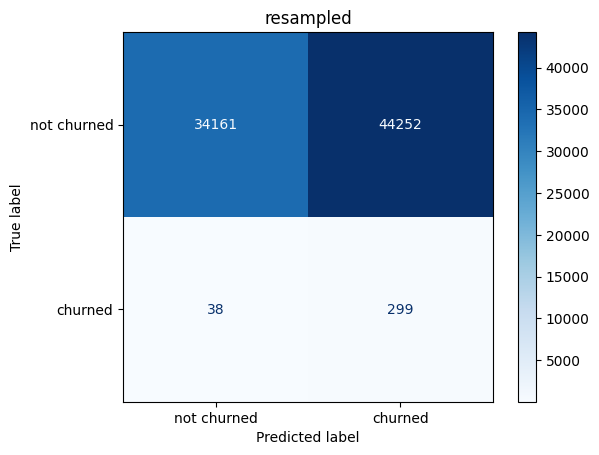

In [58]:
disp = ConfusionMatrixDisplay.from_estimator(
        resampled_classifier,
        X_test,
        y_test,
        display_labels=['not churned','churned'],
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('resampled')

print(disp.confusion_matrix)

plt.show()

In [59]:
# saving model
with open("resampled_classifier_130323.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pickle.dump(resampled_classifier, file) 

In [60]:
# Opening saved model
with open("./resampled_classifier_130323.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [61]:
prediction = loaded_model.predict([[30000,30000]]) # Passing in variables for prediction (p1, previous_p1)
print("The churned label is",prediction[0]) # Printing result

The churned label is False


c:\Users\kirik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
